<a href="https://colab.research.google.com/github/felissia/Early-Cataract-Detection/blob/main/RM_RMSProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!file /content/Dataset4 (2).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `file /content/Dataset4 (2).zip'


In [ ]:
#import dataset
import zipfile
import os

In [ ]:
zip_path = "/content/Dataset5.zip"
extract_path = "/content"  # Langsung ke /content

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
dataset_path = "/content/Dataset5"

print(os.listdir(dataset_path))

['test', 'train']


# DenseNet

In [ ]:
#Import
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 30s 256ms/step - accuracy: 0.5918 - loss: 2.2617 - val_accuracy: 0.9794 - val_loss: 0.1626
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.8457 - loss: 0.3290 - val_accuracy: 0.9876 - val_loss: 0.0860
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.9189 - loss: 0.2106 - val_accuracy: 0.9897 - val_loss: 0.0626
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 0.9527 - loss: 0.1272 - val_accuracy: 0.9691 - val_loss: 0.0813
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.9721 - loss: 0.1223 - val_accuracy: 0.9897 - val_loss: 0.0344
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.9755 - loss: 0.0707 - val_accuracy: 0.9856 - val_loss: 0.0359
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.9864 - loss: 0

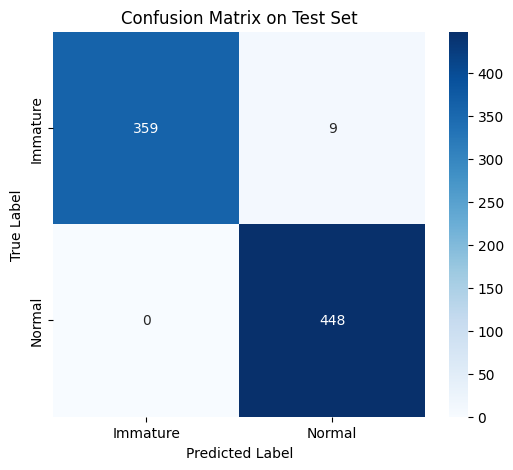

In [ ]:
#DenseNet
base_model1 = DenseNet121(
    weights = 'imagenet',
    include_top = False,
    input_shape=(224, 224, 3)
)

base_model1.trainable = False

train_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

#setup model
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

normalization_layer = layers.Rescaling(1./255)

base_model1 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model1.trainable = False

model = Sequential([
    data_augmentation,
    normalization_layer,
    base_model1,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(2, activation='softmax')
])

#Train model
model.compile(
    optimizer='RMSprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

test_dataset = image_dataset_from_directory(
    '/content/Dataset5/test',
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    shuffle=False
)

class_names = test_dataset.class_names
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("📋 Classification Report on Test Set:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

In [ ]:
temp_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/Dataset5",
    image_size=(224, 224),
    batch_size = 1
)

class_names = temp_dataset.class_names
print("Class names: ", class_names)

Found 3245 files belonging to 2 classes.
Class names:  ['test', 'train']


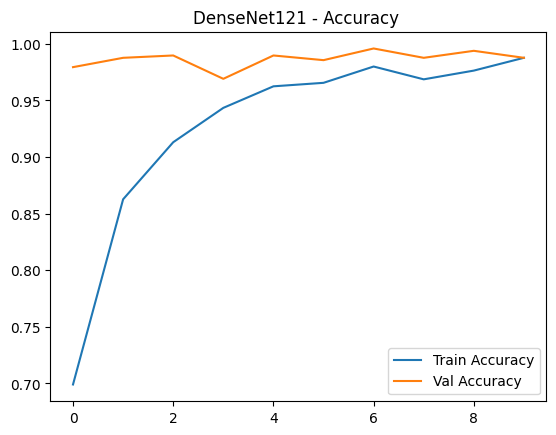

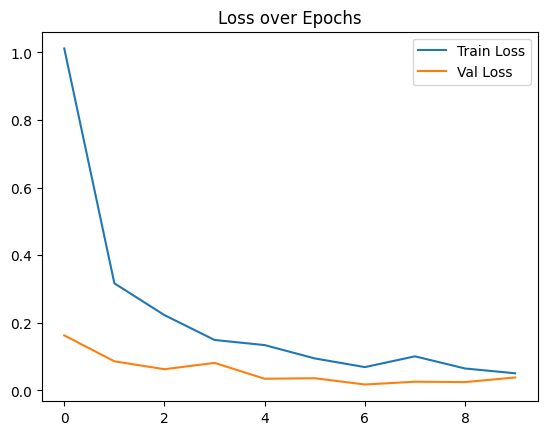

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('DenseNet121 - Accuracy ')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# ResNet

In [ ]:
import tensorflow as tf

# Cek semua device yang tersedia
print("Devices available:")
print(tf.config.list_physical_devices())

# Cek hanya GPU
print("\nGPU available:")
print(tf.config.list_physical_devices('GPU'))

import tensorflow as tf

print("🚀 Using TensorFlow version:", tf.__version__)
print("🖥️ Available GPU devices:")
print(tf.config.list_physical_devices('GPU'))

# Menampilkan device tempat layer ditempatkan
from tensorflow.python.client import device_lib
print("\n📊 Device placement log:")
print(device_lib.list_local_devices())

Devices available:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

GPU available:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
🚀 Using TensorFlow version: 2.18.0
🖥️ Available GPU devices:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

📊 Device placement log:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10511177226642612753
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 223880702879076996
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
Found 816 files belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.5007 - loss: 1.1957

61/61 ━━━━━━━━━━━━━━━━━━━━ 51s 608ms/step - accuracy: 0.5008 - loss: 1.1927 - val_accuracy: 0.4557 - val_loss: 0.7749 - learning_rate: 0.0010
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 455ms/step - accuracy: 0.4955 - loss: 0.8064 - val_accuracy: 0.4557 - val_loss: 1.1004 - learning_rate: 0.0010
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.4828 - loss: 0.7561

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 462ms/step - accuracy: 0.4829 - loss: 0.7555 - val_accuracy: 0.4557 - val_loss: 0.7125 - learning_rate: 0.0010
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.5283 - loss: 0.6971

61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 456ms/step - accuracy: 0.5282 - loss: 0.6971 - val_accuracy: 0.4557 - val_loss: 0.7015 - learning_rate: 0.0010
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.5101 - loss: 0.6976

61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 473ms/step - accuracy: 0.5100 - loss: 0.6976 - val_accuracy: 0.5443 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 451ms/step - accuracy: 0.5098 - loss: 0.6955 - val_accuracy: 0.6103 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 455ms/step - accuracy: 0.5094 - loss: 0.6922 - val_accuracy: 0.6247 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 448ms/step - accuracy: 0.5540 - loss: 0.6923 - val_accuracy: 0.4557 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 447ms/step - accuracy: 0.4888 - loss: 0.6924 - val_accuracy: 0.5959 - val_loss: 0.6927 - learning_rate: 2.0000e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 447ms/step - accuracy: 0.5041 - loss: 0.6922 - val_accuracy: 0.6412 - val_loss: 0.6928 - learning_rate: 2.0000e-04
Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.5917 - loss: 0.677

61/61 ━━━━━━━━━━━━━━━━━━━━ 57s 637ms/step - accuracy: 0.5920 - loss: 0.6770 - val_accuracy: 0.5278 - val_loss: 0.6877 - learning_rate: 1.0000e-06
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.6605 - loss: 0.6448

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 472ms/step - accuracy: 0.6608 - loss: 0.6447 - val_accuracy: 0.5443 - val_loss: 0.6869 - learning_rate: 1.0000e-06
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.6862 - loss: 0.6157

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 467ms/step - accuracy: 0.6864 - loss: 0.6156 - val_accuracy: 0.5546 - val_loss: 0.6810 - learning_rate: 1.0000e-06
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7275 - loss: 0.5801

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 468ms/step - accuracy: 0.7274 - loss: 0.5800 - val_accuracy: 0.6454 - val_loss: 0.6651 - learning_rate: 1.0000e-06
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.7178 - loss: 0.5635

61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 474ms/step - accuracy: 0.7179 - loss: 0.5634 - val_accuracy: 0.7072 - val_loss: 0.6324 - learning_rate: 1.0000e-06
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.7611 - loss: 0.5270

61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 465ms/step - accuracy: 0.7611 - loss: 0.5270 - val_accuracy: 0.7340 - val_loss: 0.5769 - learning_rate: 1.0000e-06
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7601 - loss: 0.5152

61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 474ms/step - accuracy: 0.7602 - loss: 0.5151 - val_accuracy: 0.7567 - val_loss: 0.5339 - learning_rate: 1.0000e-06
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7759 - loss: 0.4980

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 472ms/step - accuracy: 0.7761 - loss: 0.4978 - val_accuracy: 0.8247 - val_loss: 0.4916 - learning_rate: 1.0000e-06
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.8082 - loss: 0.4650

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 462ms/step - accuracy: 0.8082 - loss: 0.4649 - val_accuracy: 0.8454 - val_loss: 0.4549 - learning_rate: 1.0000e-06
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.7960 - loss: 0.4647

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 460ms/step - accuracy: 0.7963 - loss: 0.4643 - val_accuracy: 0.8536 - val_loss: 0.4349 - learning_rate: 1.0000e-06
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8264 - loss: 0.4289

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 467ms/step - accuracy: 0.8264 - loss: 0.4289 - val_accuracy: 0.8577 - val_loss: 0.4204 - learning_rate: 1.0000e-06
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.8447 - loss: 0.4137

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 474ms/step - accuracy: 0.8447 - loss: 0.4136 - val_accuracy: 0.8598 - val_loss: 0.3937 - learning_rate: 1.0000e-06
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8364 - loss: 0.4035

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 470ms/step - accuracy: 0.8366 - loss: 0.4034 - val_accuracy: 0.8742 - val_loss: 0.3829 - learning_rate: 1.0000e-06
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8619 - loss: 0.3703

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 470ms/step - accuracy: 0.8619 - loss: 0.3703 - val_accuracy: 0.8619 - val_loss: 0.3627 - learning_rate: 1.0000e-06
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8581 - loss: 0.3694

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 468ms/step - accuracy: 0.8581 - loss: 0.3693 - val_accuracy: 0.8804 - val_loss: 0.3474 - learning_rate: 1.0000e-06
Epoch 16/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8695 - loss: 0.3491

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 470ms/step - accuracy: 0.8696 - loss: 0.3490 - val_accuracy: 0.8701 - val_loss: 0.3351 - learning_rate: 1.0000e-06
Epoch 17/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.8798 - loss: 0.3373

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 480ms/step - accuracy: 0.8800 - loss: 0.3371 - val_accuracy: 0.8887 - val_loss: 0.3162 - learning_rate: 1.0000e-06
Epoch 18/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 39s 455ms/step - accuracy: 0.8911 - loss: 0.3193 - val_accuracy: 0.8722 - val_loss: 0.3182 - learning_rate: 1.0000e-06
Epoch 19/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.8928 - loss: 0.3080

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 480ms/step - accuracy: 0.8929 - loss: 0.3079 - val_accuracy: 0.8990 - val_loss: 0.2989 - learning_rate: 1.0000e-06
Epoch 20/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9085 - loss: 0.2896

61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 467ms/step - accuracy: 0.9086 - loss: 0.2896 - val_accuracy: 0.8990 - val_loss: 0.2871 - learning_rate: 1.0000e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

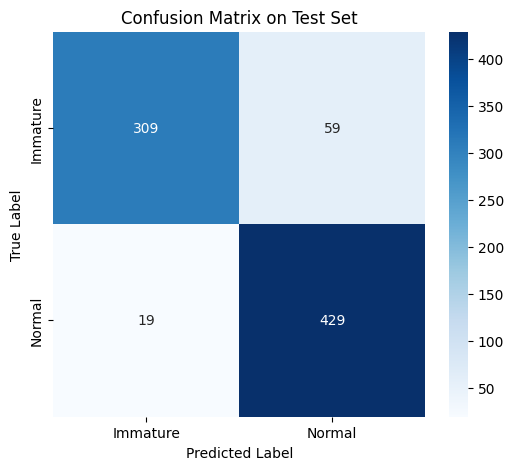

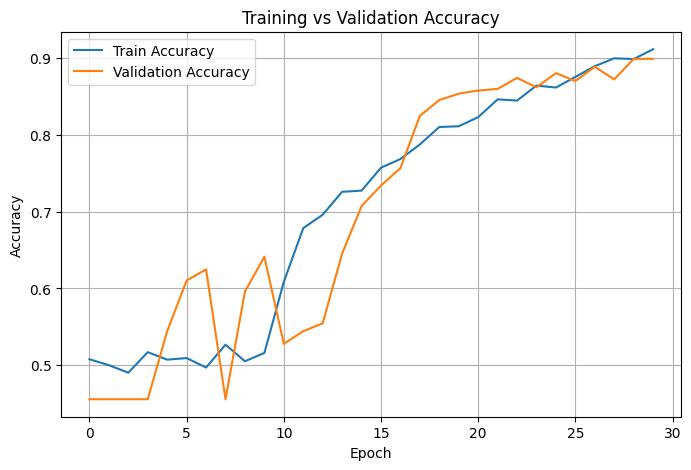

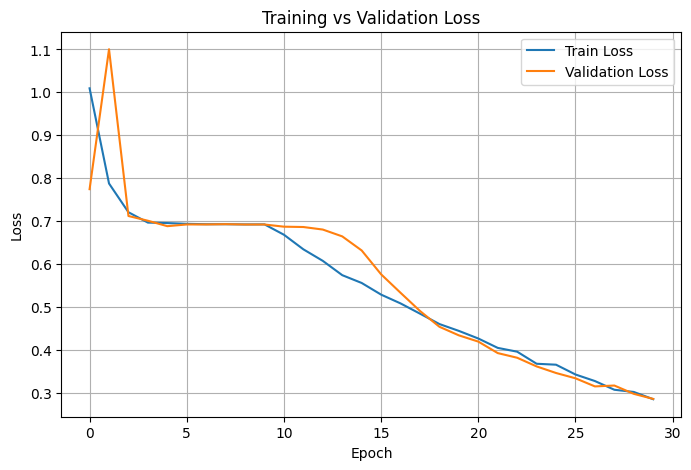

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
train_dir = '/content/Dataset5/train'
test_dir = '/content/Dataset5/test'

# Parameters
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
SEED = 123

# Load dataset
raw_train_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

raw_val_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

# Simpan class names
class_names = raw_train_ds.class_names

# Normalisasi val dan test (tanpa augmentasi)
val_ds = raw_val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)

# Hitung class weights
y_labels = []
for _, labels in raw_train_ds:
    y_labels.extend(np.argmax(labels.numpy(), axis=1))
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_labels), y=y_labels)
class_weight_dict = dict(enumerate(class_weights))

# Augmentasi hanya untuk training
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
])

# Final train dataset
train_ds = raw_train_ds.map(lambda x, y: (data_augmentation(x), y))
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)

# Base Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Full Model
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

# Compile awal
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Training awal
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:  # Hanya buka 30 layer terakhir
    layer.trainable = False

# Compile ulang dengan learning rate kecil
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Training fine-tune
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Evaluasi
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("📋 Classification Report on Test Set:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

# Accuracy Plot
train_acc = history.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
train_loss = history.history['loss'] + history_finetune.history['loss']
val_loss = history.history['val_loss'] + history_finetune.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# MobileNet EffficientNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
import numpy as np
import matplotlib.pyplot as plt

# --- Load Dataset ---
train_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# --- Augmentasi dan Prefetching ---
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# --- Fungsi Build Model ---
def build_model(base_model, preprocess_func):
    base_model.trainable = False  # freeze feature extractor
    model = models.Sequential([
        data_augmentation,
        layers.Lambda(preprocess_func),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- Train MobileNetV2 ---
mobilenet_base = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model = build_model(mobilenet_base, mobilenet_preprocess)

print("\nTraining MobileNetV2...")
mobilenet_history = mobilenet_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# --- Train EfficientNetB0 ---
efficientnet_base = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
efficientnet_model = build_model(efficientnet_base, efficientnet_preprocess)

print("\nTraining EfficientNetB0...")
efficientnet_history = efficientnet_model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training MobileNetV2...
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.6514 - loss: 1.1044 - val_accuracy: 0.9464 - val_loss: 0.1970
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8849 - loss: 0.2878 - val_accuracy: 0.9773 - val_loss: 0.1077
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9319 - loss: 0.1623 - val_accuracy: 0.9814 - val_loss: 0.0648
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9652 - loss: 0.0960 - val_accuracy: 0.9505 - val_loss: 0.1183
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9701 - loss: 0.0795 - val_accuracy: 0.9938 - val_loss: 0.0258
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9678 - loss: 0.0795 - val_accuracy: 0.9670 - val_loss: 0.0829
Epoch 7/10
61/61 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
               precision    recall  f1-score   support

    Immature       1.00      1.00      1.00       221
      Normal       1.00      1.00      1.00       264

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485

Confusion Matrix:
 [[221   0]
 [  1

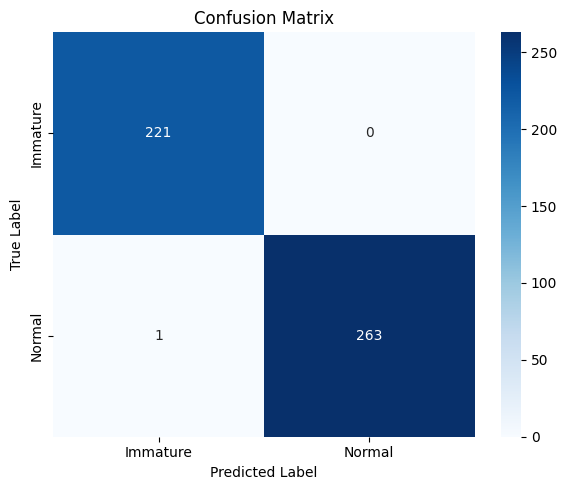

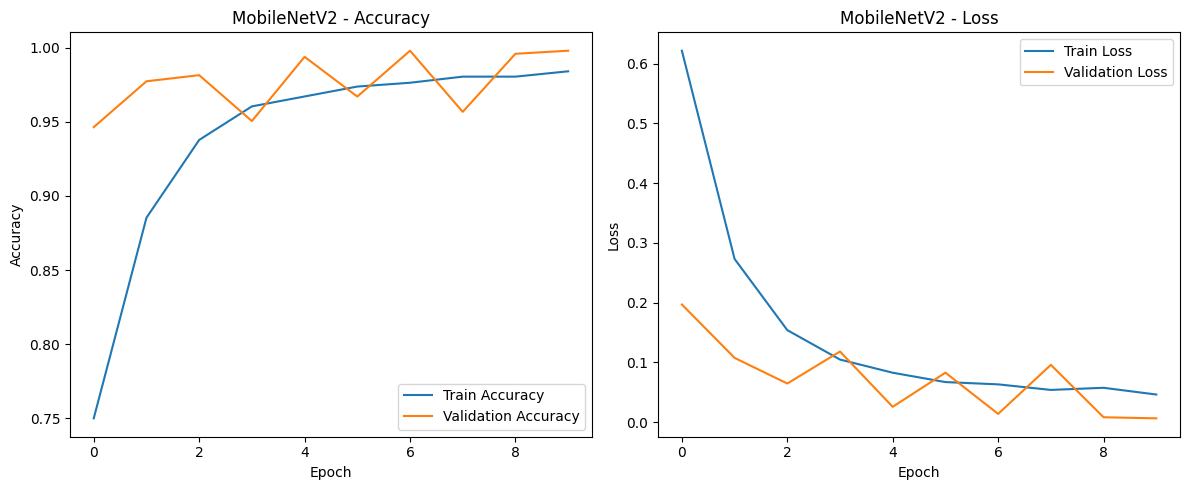

In [ ]:
# Gunakan salah satu model (contoh MobileNetV2)
model = mobilenet_model  # Atau model lain yang kamu pakai

# ===== Buat prediksi dan ambil label =====
y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))      # True label
    y_pred.extend(np.argmax(preds, axis=1))                # Predicted label

# ===== Classification Report dan Confusion Matrix =====
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# ===== Visualisasi Confusion Matrix =====
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ===== Grafik Training dan Validation (jika history tersedia) =====
# Gabungkan jika kamu fine-tune
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_acc))

# ===== Plot Accuracy dan Loss =====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'], label='Train Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Classification Report:
               precision    recall  f1-score   support

    Immature       1.00      0.98      0.99       221
      Normal       0.98      1.00      0.99       264

    accuracy                           0.99       485
   macro avg       0.99      0.99      0.99       485
weighted avg       0.99      0.99      0.99       485

Confusion Matrix:
 [[216   5]
 [  0 

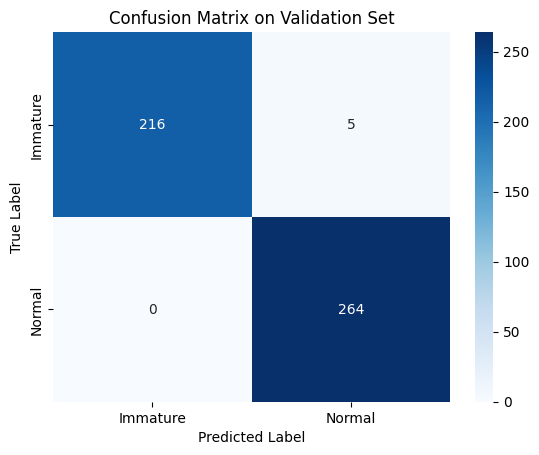

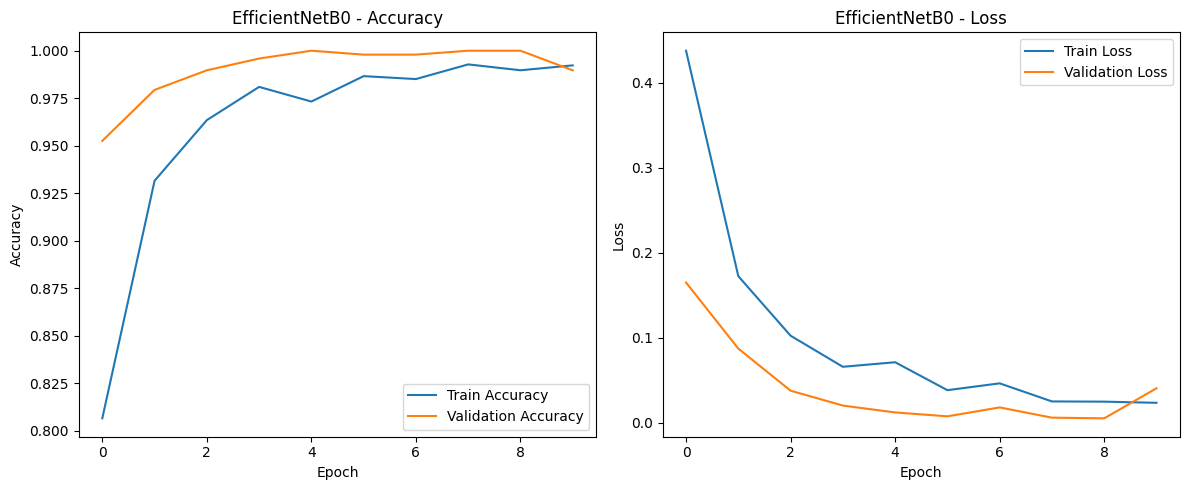

In [ ]:
#efficientnetmodel
model = efficientnet_model

# Prediksi dan label asli
y_true = []
y_pred = []
for images, labels in val_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Validation Set')
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(efficientnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(efficientnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNetB0 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(efficientnet_history.history['loss'], label='Train Loss')
plt.plot(efficientnet_history.history['val_loss'], label='Validation Loss')
plt.title('EfficientNetB0 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
